# 6.9 사이킷런의 결정 트리로 붓꽃 분류하기

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris.dot"),
  feature_names=iris.feature_names,
)

!ls

buys_computer.png  computer.pdf		  iris_tree_model.dot
CART.csv	   Decision_Tree.png	  OutputFile.png
computer	   dec_tree_for_iris.dot  sample_data


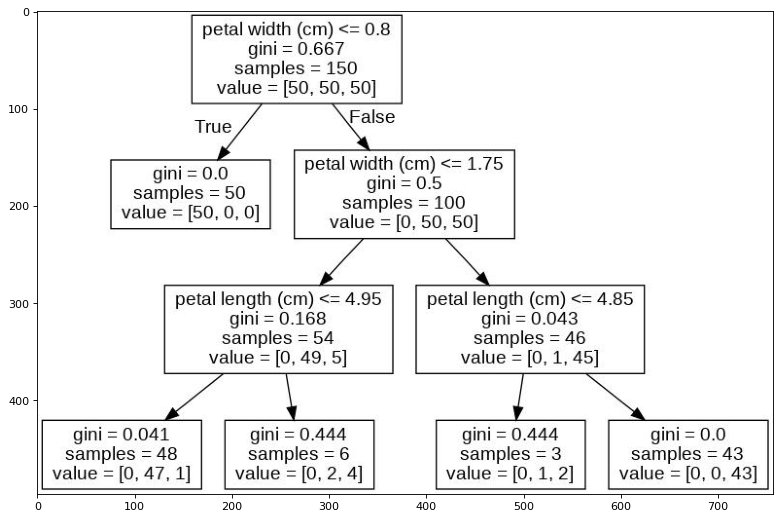

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, 
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

**LAB 6-2 꽃받침의 너비와 길이로 결정트리를 만들자**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data[:,:2], iris.target
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names[:2]
)

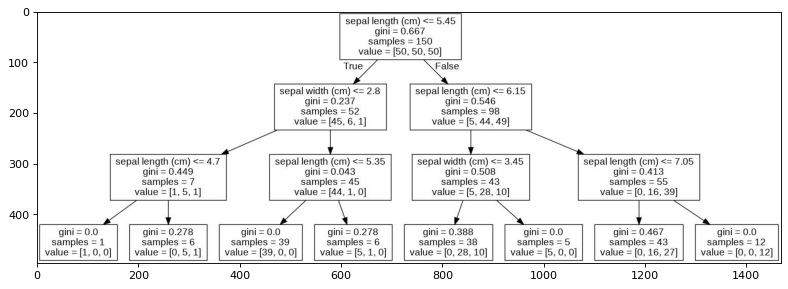

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

컴퓨터 구입여부 수기 입력 및 구현과 비교

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#컴퓨터 구입여부 데이터 프레임 만들기

In [17]:
age_series = pd.Series(['youth','youth','middle_aged','senior','senior','senior','middle_aged','youth','youth','senior','youth','middle_aged','middle_aged','senior'])
income_series = pd.Series(['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'])
student_series = pd.Series(['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'])
credit_series = pd.Series(['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'])
buys_computer_series = pd.Series(['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no'])

index_series =pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

data = pd.DataFrame({'index':index_series,'age':age_series, 'income':income_series,'student':student_series,'credit':credit_series,'buys_computer':buys_computer_series})

# 지니계수 구하기

In [18]:
from functools import reduce

def get_gini(df, label):
    D_len = df[label].count() # 데이터 전체 길이
    # 각 클래스별 Count를 담은 Generator 생성
    count_arr = (value for key, value in df[label].value_counts().items())
    # reduce를 이용해 초기값 1에서 각 클래스 (count / D_len)^2 빼기
    return reduce(lambda x, y: x - (y/D_len)**2 ,count_arr,1)

In [19]:
import itertools # 변수의 모든 클래시 조합을 얻기 위해 itertools 불러오기

def get_binary_split(df, attribute):
    attr_unique = df[attribute].unique()
    # 이중 For loop List Comprehension
    result = [
            list(item) 
            for i in range(1, len(attr_unique)) # 1부터 변수의 클래스 갯수-1 까지 Iteration
            for item in itertools.combinations(attr_unique, i) # i를 길이로 하는 조합 생성
        ]
    return result

In [20]:
def get_attribute_gini_index(df, attribute, label):
    result = {}
    keys = get_binary_split(df, attribute)
    D_len = df[attribute].shape[0]
    for key in keys:
        t_index = df[attribute].map(lambda x: x in key) # Split한 클래스들에 속하는 df Index 추출
        Dj_len = sum(t_index) # Sum으로 True갯수 계산
        # Gini 식 계산,  ~index를 통해 False_index로 전환
        gini = (Dj_len / D_len) * get_gini(df[t_index], label) + ((D_len - Dj_len) / D_len) * get_gini(df[~t_index], label)
        result[tuple(key)] = gini
    return result

In [21]:
# 1-age
get_attribute_gini_index(data, "age", "buys_computer")

{('middle_aged',): 0.35714285714285715,
 ('middle_aged', 'senior'): 0.3936507936507937,
 ('senior',): 0.4571428571428572,
 ('youth',): 0.3936507936507937,
 ('youth', 'middle_aged'): 0.4571428571428572,
 ('youth', 'senior'): 0.35714285714285715}

In [22]:
# 2-income
get_attribute_gini_index(data, "income", "buys_computer")

{('high',): 0.4428571428571429,
 ('high', 'low'): 0.4583333333333333,
 ('high', 'medium'): 0.45,
 ('low',): 0.45,
 ('medium',): 0.4583333333333333,
 ('medium', 'low'): 0.4428571428571429}

In [23]:
# 3-credit
get_attribute_gini_index(data, "student", "buys_computer")

{('no',): 0.3673469387755103, ('yes',): 0.3673469387755103}

In [24]:
# 4-credit
get_attribute_gini_index(data, "credit", "buys_computer")

{('excellent',): 0.42857142857142855, ('fair',): 0.42857142857142855}

### **( 지니계수 확인 완료 )**

# 데이터프레임 인코딩 후 트리 만들어서 시각화하기

In [ ]:
get_gini(data,'buys_computer')

0.4591836734693877

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
le_age = LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [ ]:
data['age_n'] = le_age.fit_transform(data['age'])
data['income_n'] = le_income.fit_transform(data['income'])
data['student_n'] = le_student.fit_transform(data['student'])
data['credit_n'] = le_credit_rating.fit_transform(data['credit'])
data['buys_computer_n'] = le_credit_rating.fit_transform(data['buys_computer'])

In [ ]:
data_new = data.drop(['age','income','student','credit','buys_computer'], axis='columns')
data_new

,index,age_n,income_n,student_n,credit_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1
5,6,1,1,1,0,0
6,7,0,1,1,0,1
7,8,2,2,0,1,0
8,9,2,1,1,1,1
9,10,1,2,1,1,1


In [ ]:
feature_cols = ['age_n', 'income_n', 'student_n', 'credit_n']
x = data_new.drop(['buys_computer_n','index'], axis='columns') #input
y = data_new['buys_computer_n'] #target

In [ ]:
dec_tree = DecisionTreeClassifier(max_depth=4)
dec_tree.fit(x, y)

DecisionTreeClassifier(max_depth=4)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_data.dot"),
  feature_names=feature_cols,
)

!ls

dec_tree_for_data.dot  sample_data


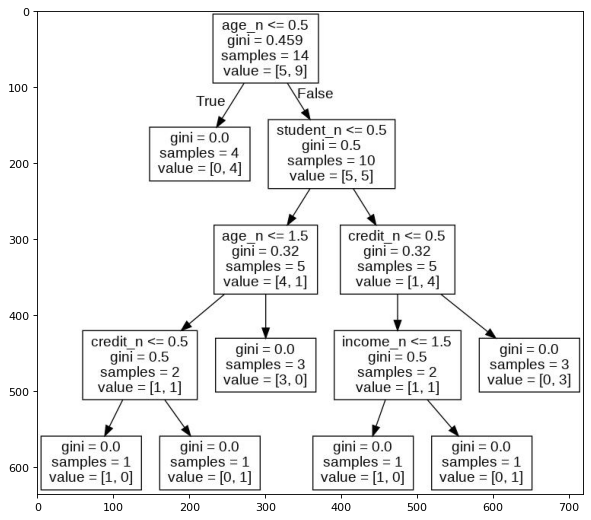

In [ ]:
!dot -Tjpg dec_tree_for_data.dot -o dec_tree_for_data.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('/content/dec_tree_for_data.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80, 
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

### **( 위의 트리 그래프를 통해 수기로 구한 지니 불순도가 가장 낮은 G(age=middle)의 결과가 나온것을 확인 )**